# _CUSTOMER - CLUSTERING_



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import LocalOutlierFactor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/customer-clustering/segmentation data.csv
/kaggle/input/customer-clustering/segmentation data legend.xlsx


# _1) Understand Data and Visualizing Data_

In [2]:
data = pd.read_csv("../input/customer-clustering/segmentation data.csv")

In [3]:
data[0:5]

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [4]:
data.drop("ID", axis = 1, inplace= True)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data[data.notnull().all(axis=1)]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]

In [7]:
data[data.isnull().all(axis=1)]

Empty DataFrame
Columns: [Sex, Marital status, Age, Education, Income, Occupation, Settlement size]
Index: []

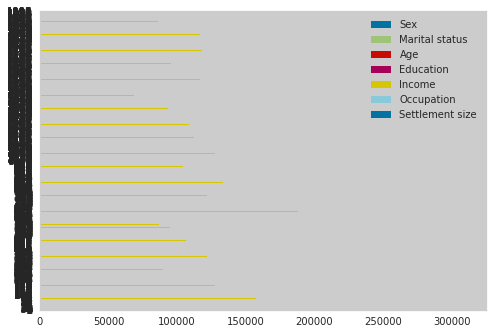

In [8]:
data.plot.barh();

In [9]:
data.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

<AxesSubplot:xlabel='Income', ylabel='Density'>

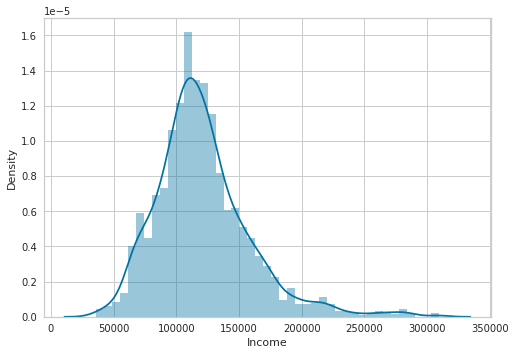

In [10]:
sbn.distplot(data.Income)

<AxesSubplot:xlabel='Income', ylabel='Density'>

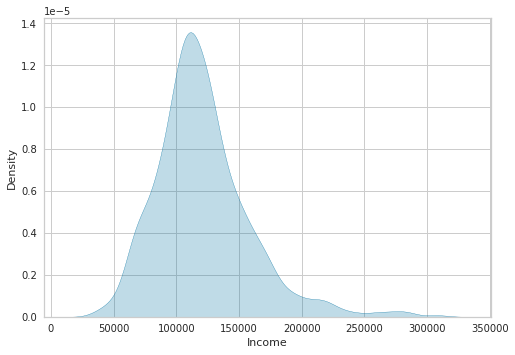

In [11]:
sbn.kdeplot(data.Income,  shade = True)

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

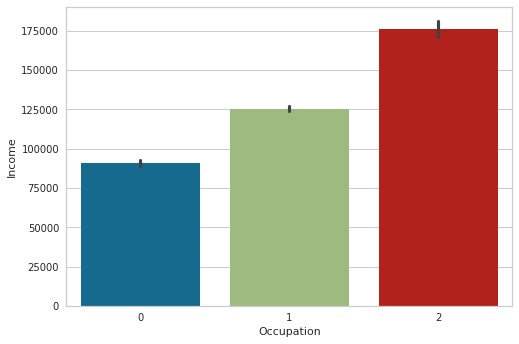

In [12]:
sbn.barplot(x = "Occupation", y= "Income",  data = data)

<AxesSubplot:xlabel='Sex', ylabel='Income'>

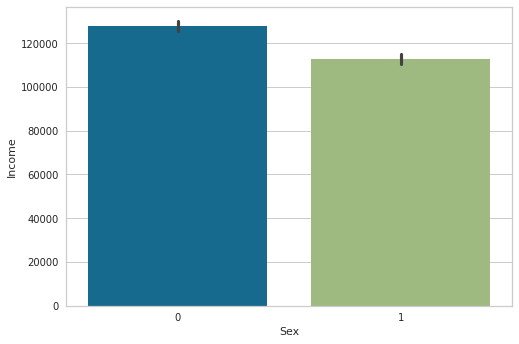

In [13]:
sbn.barplot(x = "Sex", y= "Income",  data = data)

<AxesSubplot:xlabel='Marital status', ylabel='Income'>

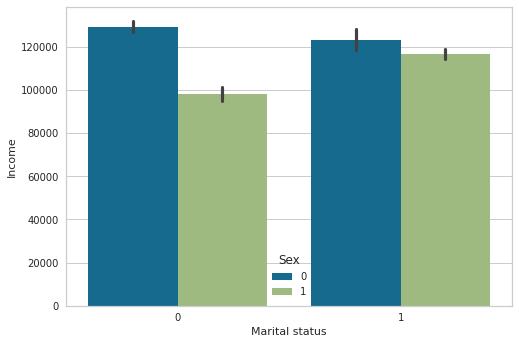

In [14]:
sbn.barplot(x = "Marital status", y= "Income", hue = "Sex",  data = data)

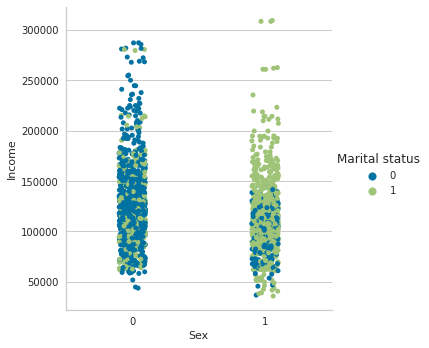

In [15]:
sbn.catplot(x = "Sex", y = "Income", hue = "Marital status", data = data)

In [16]:
data[0:5]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

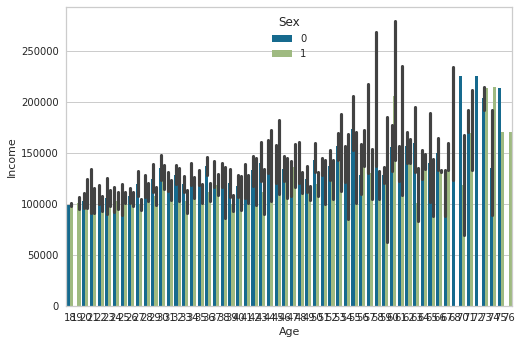

In [17]:
sbn.barplot(x = "Age", y = "Income", hue = "Sex", data = data);

In [18]:
data["Age"].sort_values()

1819    18
1421    18
1160    18
1307    19
1354    19
        ..
186     74
756     74
330     75
536     75
1064    76
Name: Age, Length: 2000, dtype: int64

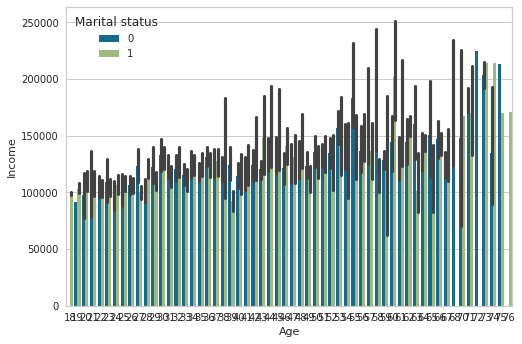

In [19]:
sbn.barplot(x = "Age", y = "Income", hue = "Marital status", data = data);

<AxesSubplot:xlabel='Marital status', ylabel='Age'>

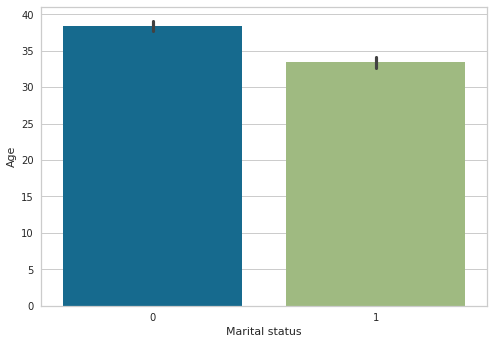

In [20]:
sbn.barplot(x = "Marital status", y = "Age", data = data )

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

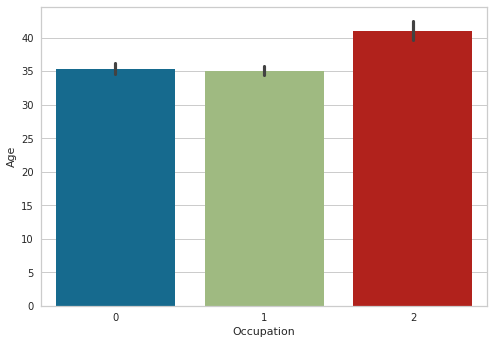

In [21]:
sbn.barplot(x = "Occupation", y = "Age", data = data )

In [22]:
occupation_two = data[data.Occupation == 2]

In [23]:
occupation_two

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
7       0               0   35          1  193621           2                1
9       0               1   28          1  174646           2                0
18      1               1   44          2  261952           2                2
34      1               1   33          1  155569           2                1
40      0               0   30          0  163329           2                1
...   ...             ...  ...        ...     ...         ...              ...
1296    0               0   33          1  151339           2                1
1366    1               0   31          1  143321           2                1
1425    1               1   27          1  131542           2                1
1465    1               1   36          1  135896           2                1
1545    1               0   28          1  141453           2                1

[254 rows x 7 columns]

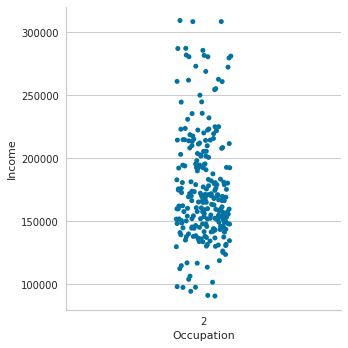

In [24]:
sbn.catplot(x = "Occupation", y = "Income", data = occupation_two)

In [25]:
occupation_two["Occupation"].sort_values()

7       2
1029    2
1030    2
1033    2
1037    2
       ..
584     2
594     2
603     2
485     2
1545    2
Name: Occupation, Length: 254, dtype: int64

In [26]:
data[data["Settlement size"]==2]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
12      1               1   22          1  108687           1                2
17      0               0   25          0  157434           1                2
18      1               1   44          2  261952           2                2
...   ...             ...  ...        ...     ...         ...              ...
1291    0               0   46          1   98520           1                2
1295    0               0   37          1  114552           1                2
1297    0               0   71          2  170387           1                2
1298    0               0   35          1  118288           1                2
1299    0               0   40          1  109992           1                2

[467 rows x 7 columns]

In [27]:
data[data["Income"]>300000]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
374     1               1   60          2  309364           2                2
915     1               1   32          1  308491           2                1
1041    1               1   61          2  308529           2                2

In [28]:
data.loc[1041]

Sex                     1
Marital status          1
Age                    61
Education               2
Income             308529
Occupation              2
Settlement size         2
Name: 1041, dtype: int64

In [29]:
data[data["Settlement size"] == 0]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
2       0               0   49          1   89210           0                0
5       0               0   35          1  144848           0                0
8       0               1   61          2  151591           0                0
9       0               1   28          1  174646           2                0
10      1               1   25          1  108469           1                0
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[989 rows x 7 columns]

In [30]:
data["Income"].min()

35832

In [31]:
data[data["Income"]<36000]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
640    1               1   27          1   35832           0                0

In [32]:
data[0:5]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

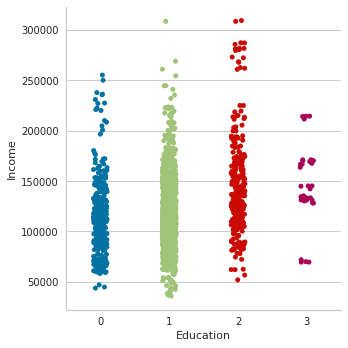

In [33]:
sbn.catplot(x = "Education", y = "Income", data = data)

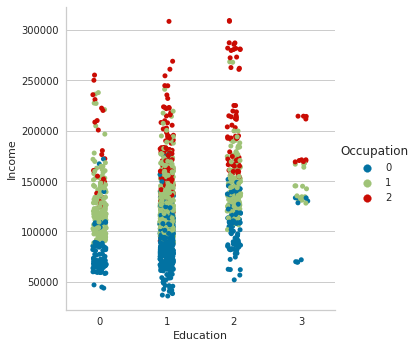

In [34]:
sbn.catplot(x = "Education", y = "Income", hue = "Occupation", data = data)

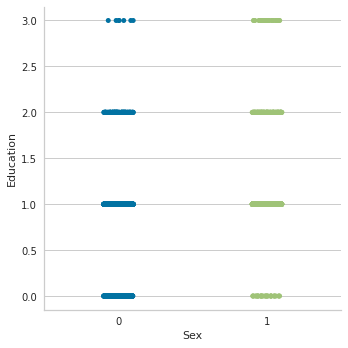

In [35]:
sbn.catplot(x = "Sex", y = "Education", data = data)

<AxesSubplot:xlabel='Income'>

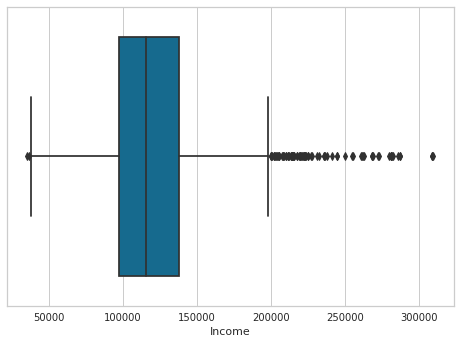

In [36]:
sbn.boxplot(data["Income"])

In [37]:
data[data["Income"]>200000]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
18      1               1   44          2  261952           2                2
56      0               0   52          1  202575           2                2
63      0               0   25          0  227385           1                2
87      0               0   47          1  241068           1                1
95      0               0   58          2  268340           1                1
...   ...             ...  ...        ...     ...         ...              ...
1074    0               1   43          2  280566           2                2
1076    1               1   71          3  211572           2                1
1092    1               1   45          2  260847           2                2
1093    0               0   65          2  285647           2                2
1097    0               0   57          2  281647           2                1

[79 rows x 7 columns]

In [38]:
data[data["Income"]>200000].index

Int64Index([  18,   56,   63,   87,   95,  105,  136,  153,  154,  163,  175,
             186,  190,  205,  226,  227,  268,  272,  287,  291,  294,  304,
             330,  332,  373,  374,  378,  381,  387,  395,  431,  450,  491,
             496,  507,  509,  563,  615,  616,  637,  650,  653,  672,  714,
             736,  744,  763,  778,  784,  808,  818,  854,  887,  895,  915,
             917,  921,  945,  953, 1002, 1003, 1005, 1022, 1025, 1027, 1028,
            1029, 1033, 1037, 1041, 1052, 1060, 1062, 1073, 1074, 1076, 1092,
            1093, 1097],
           dtype='int64')

In [39]:
data.describe().T

count         mean           std      min       25%  \
Sex              2000.0       0.4570      0.498272      0.0      0.00   
Marital status   2000.0       0.4965      0.500113      0.0      0.00   
Age              2000.0      35.9090     11.719402     18.0     27.00   
Education        2000.0       1.0380      0.599780      0.0      1.00   
Income           2000.0  120954.4190  38108.824679  35832.0  97663.25   
Occupation       2000.0       0.8105      0.638587      0.0      0.00   
Settlement size  2000.0       0.7390      0.812533      0.0      0.00   

                      50%        75%       max  
Sex                   0.0       1.00       1.0  
Marital status        0.0       1.00       1.0  
Age                  33.0      42.00      76.0  
Education             1.0       1.00       3.0  
Income           115548.5  138072.25  309364.0  
Occupation            1.0       1.00       2.0  
Settlement size       1.0       1.00       2.0

# _2) Outliers and Solution_


<AxesSubplot:xlabel='Income'>

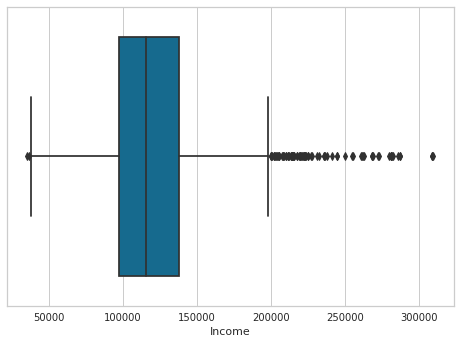

In [40]:
sbn.boxplot(data["Income"])

In [41]:
income = data["Income"]

In [42]:
Q3 = income.quantile(0.75)

In [43]:
Q3

138072.25

In [44]:
Q1 = income.quantile(0.25)

In [45]:
Q1

97663.25

In [46]:
IQR = Q3-Q1

In [47]:
lower_limit = Q1 - IQR*1.5

In [48]:
lower_limit

37049.75

In [49]:
upper_limit = Q3 + IQR*1.5

In [50]:
upper_limit

198685.75

In [51]:
upper_outlier = upper_limit < income

In [52]:
data[upper_outlier][0:5]

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
18    1               1   44          2  261952           2                2
56    0               0   52          1  202575           2                2
63    0               0   25          0  227385           1                2
87    0               0   47          1  241068           1                1
95    0               0   58          2  268340           1                1

In [53]:
lower_outlier = lower_limit > income

In [54]:
income[lower_outlier] = lower_limit

In [55]:
income[lower_outlier]

640     37049.75
1368    37049.75
Name: Income, dtype: float64

In [56]:
income[upper_outlier] = upper_limit

In [57]:
income[upper_outlier]

18      198685.75
56      198685.75
63      198685.75
87      198685.75
95      198685.75
          ...    
1074    198685.75
1076    198685.75
1092    198685.75
1093    198685.75
1097    198685.75
Name: Income, Length: 81, dtype: float64

<AxesSubplot:xlabel='Income'>

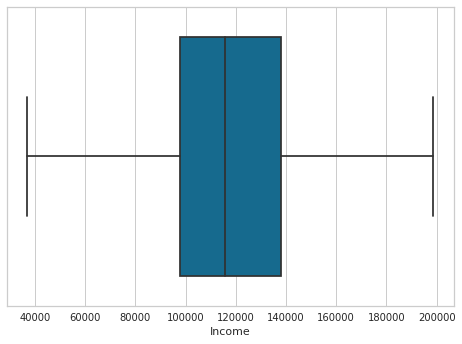

In [58]:
sbn.boxplot(data["Income"])

In [59]:
data.loc[640]

Sex                    1.00
Marital status         1.00
Age                   27.00
Education              1.00
Income             37049.75
Occupation             0.00
Settlement size        0.00
Name: 640, dtype: float64

In [60]:
data[upper_outlier]

Sex  Marital status  Age  Education     Income  Occupation  \
18      1               1   44          2  198685.75           2   
56      0               0   52          1  198685.75           2   
63      0               0   25          0  198685.75           1   
87      0               0   47          1  198685.75           1   
95      0               0   58          2  198685.75           1   
...   ...             ...  ...        ...        ...         ...   
1074    0               1   43          2  198685.75           2   
1076    1               1   71          3  198685.75           2   
1092    1               1   45          2  198685.75           2   
1093    0               0   65          2  198685.75           2   
1097    0               0   57          2  198685.75           2   

      Settlement size  
18                  2  
56                  2  
63                  2  
87                  1  
95                  1  
...               ...  
1074                2  
1076                1  
1092                2  
1093                2  
1097                1  

[81 rows x 7 columns]

<AxesSubplot:xlabel='Income'>

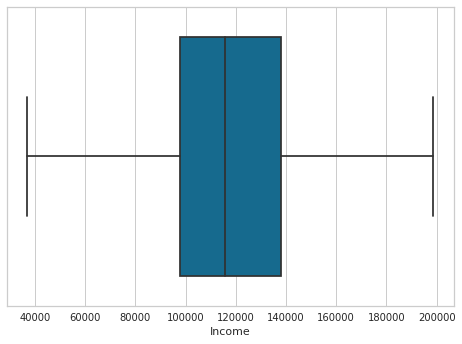

In [61]:
sbn.boxplot(data["Income"])

# _3) K-Means_

In [62]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(data)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_

In [63]:
clusters

array([1, 0, 2, ..., 2, 2, 2], dtype=int32)

In [64]:
centers

array([[2.75510204e-01, 4.43877551e-01, 4.22321429e+01, 1.24489796e+00,
        1.71846701e+05, 1.45663265e+00, 1.35204082e+00],
       [4.61918892e-01, 4.89614243e-01, 3.59465875e+01, 1.03956479e+00,
        1.20780425e+05, 8.77349159e-01, 7.99208704e-01],
       [5.67839196e-01, 5.42713568e-01, 3.16934673e+01, 8.99497487e-01,
        8.29664095e+04, 2.73031826e-01, 2.34505863e-01]])

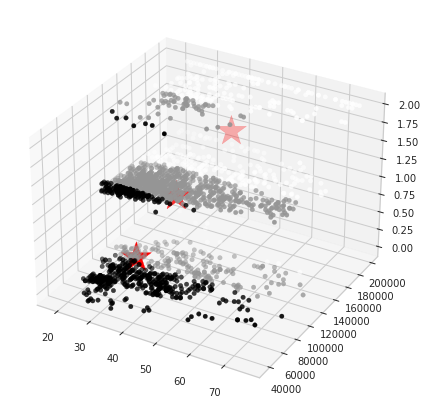

In [65]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:,2], data.iloc[:,4], data.iloc[:,5], c=clusters)
ax.scatter(centers[:,2], centers[:,4], centers[:,5], c = "red",s=1000 , marker = "*")

In [66]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(data)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_

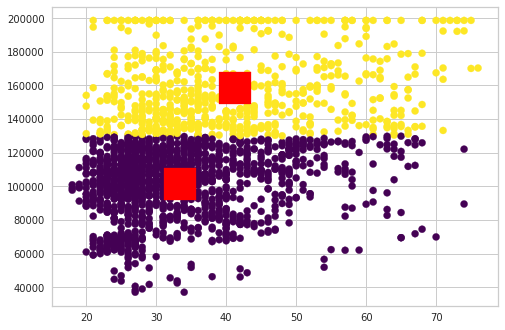

In [67]:
plt.scatter(data.iloc[:,2], data.iloc[:,4], c = clusters, s = 50, cmap = "viridis" )
plt.scatter(centers[:,2], centers[:,4], c = "red", s = 1000, marker = "," )

In [68]:
kmeans = KMeans()


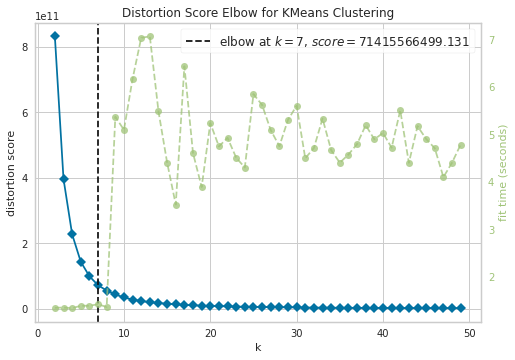

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
visualizer = KElbowVisualizer(kmeans, k = (2,50))
visualizer.fit(data)
visualizer.poof()

# _PCA for K-Means_

In [70]:
data_scaled = StandardScaler().fit_transform(data)

In [71]:
pca = PCA().fit(data_scaled)

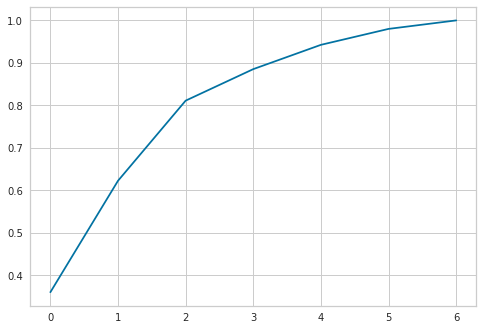

In [72]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [73]:
pca1 = PCA(n_components = 3)

In [74]:
pca_fit = pca1.fit_transform(data_scaled)

In [75]:
compounds = pd.DataFrame(data = pca_fit, columns = ["First Compound", "Second Compound", "Third Compund"])

In [76]:
compounds

First Compound  Second Compound  Third Compund
0           2.524214         0.844381       2.189460
1           0.437937         0.616680      -2.233507
2          -0.701606        -0.689156       2.286571
3           1.827553        -0.557032       0.702156
4           1.692910        -0.425077       1.231561
...              ...              ...            ...
1995       -0.845061         0.300024       1.420301
1996       -1.089419         0.797896      -1.094021
1997       -1.496877        -2.246808       0.896064
1998       -2.254471         0.621394      -0.541886
1999       -1.944086        -2.471624       0.671137

[2000 rows x 3 columns]

In [77]:
pca.explained_variance_ratio_

array([0.36011434, 0.26234   , 0.18863172, 0.07423104, 0.05717592,
       0.03751944, 0.01998754])

In [78]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(compounds)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_

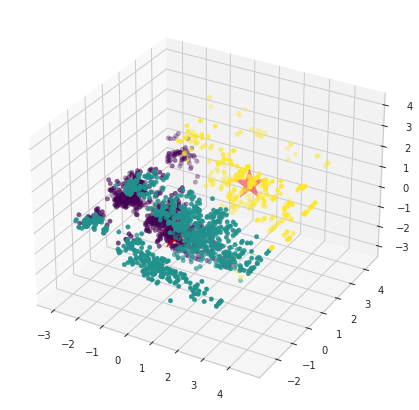

In [79]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(compounds.iloc[:,0], compounds.iloc[:,1], compounds.iloc[:,2], c=clusters, cmap = "viridis")
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c = "red",s=1000 , marker = "*")

In [80]:
dff = data.copy()

In [81]:
dff["Clusters for KMeans"] = clusters

In [82]:
dff[0:5]

Sex  Marital status  Age  Education    Income  Occupation  Settlement size  \
0    0               0   67          2  124670.0           1                2   
1    1               1   22          1  150773.0           1                2   
2    0               0   49          1   89210.0           0                0   
3    0               0   45          1  171565.0           1                1   
4    0               0   53          1  149031.0           1                1   

   Clusters for KMeans  
0                    2  
1                    0  
2                    1  
3                    1  
4                    1

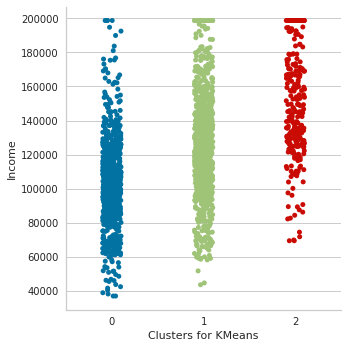

In [83]:
sbn.catplot(x = "Clusters for KMeans", y = "Income", data = dff)

# _3) Hierarchical Clustering_


In [84]:
hc_complete = linkage(data, "complete")

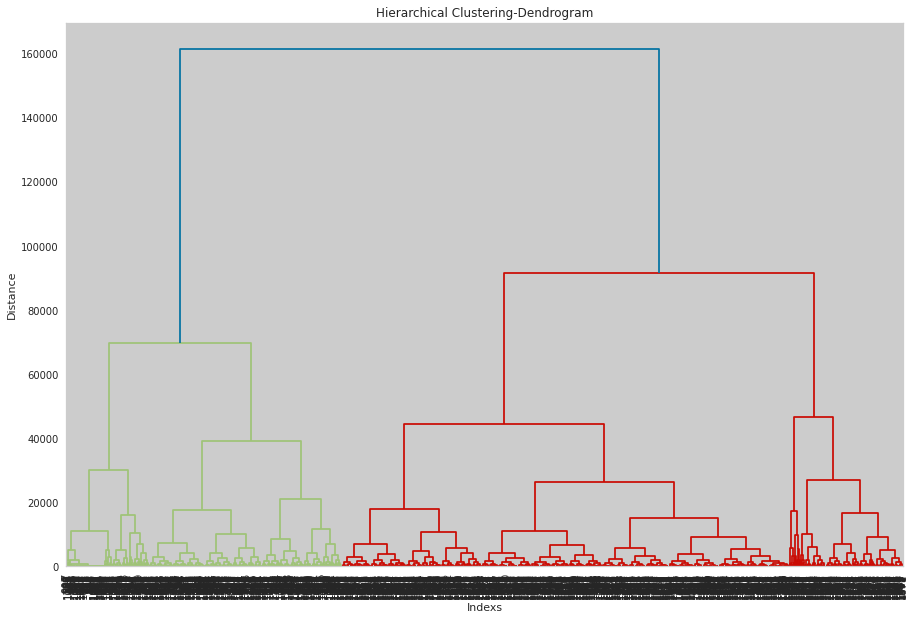

In [85]:
plt.figure(figsize = (15,10))
plt.title("Hierarchical Clustering-Dendrogram")
plt.xlabel("Indexs")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

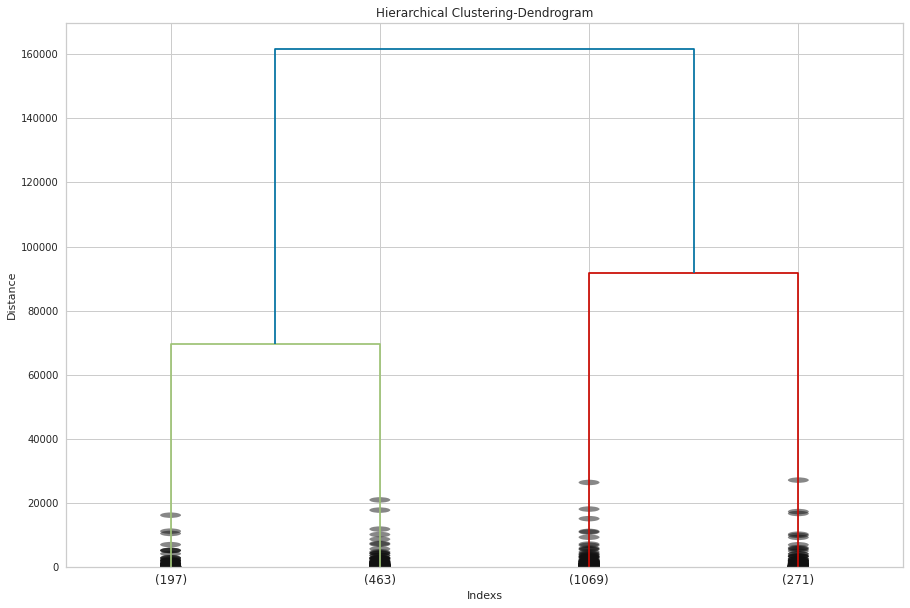

In [86]:
plt.figure(figsize = (15,10))
plt.title("Hierarchical Clustering-Dendrogram")
plt.xlabel("Indexs")
plt.ylabel("Distance")
dendrogram(hc_complete,
          truncate_mode = "lastp",
          p = 4,
          show_contracted = True);

In [87]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity="euclidean", linkage = "ward")

In [88]:
y_pred = cluster.fit_predict(data)

In [89]:
dfff = data.copy()

In [90]:
dfff[0:5]

Sex  Marital status  Age  Education    Income  Occupation  Settlement size
0    0               0   67          2  124670.0           1                2
1    1               1   22          1  150773.0           1                2
2    0               0   49          1   89210.0           0                0
3    0               0   45          1  171565.0           1                1
4    0               0   53          1  149031.0           1                1

In [91]:
dfff["Clusters_for_Hierarchical"] = y_pred

In [92]:
dfff

Sex  Marital status  Age  Education    Income  Occupation  \
0       0               0   67          2  124670.0           1   
1       1               1   22          1  150773.0           1   
2       0               0   49          1   89210.0           0   
3       0               0   45          1  171565.0           1   
4       0               0   53          1  149031.0           1   
...   ...             ...  ...        ...       ...         ...   
1995    1               0   47          1  123525.0           0   
1996    1               1   27          1  117744.0           1   
1997    0               0   31          0   86400.0           0   
1998    1               1   24          1   97968.0           0   
1999    0               0   25          0   68416.0           0   

      Settlement size  Clusters_for_Hierarchical  
0                   2                          2  
1                   2                          0  
2                   0                          1  
3                   1                          0  
4                   1                          0  
...               ...                        ...  
1995                0                          2  
1996                0                          2  
1997                0                          1  
1998                0                          1  
1999                0                          1  

[2000 rows x 8 columns]

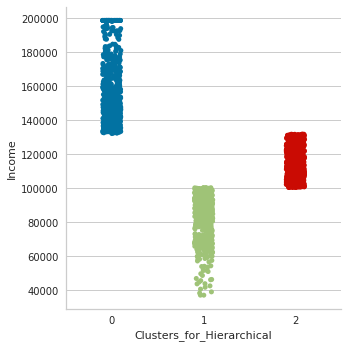

In [93]:
sbn.catplot(x = "Clusters_for_Hierarchical", y = "Income", data = dfff)

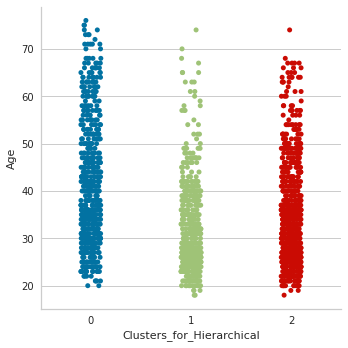

In [94]:
sbn.catplot(x = "Clusters_for_Hierarchical", y = "Age", data = dfff)

****Thanks for Viewing****